In [1]:
from ig_pkg.models.pretrained_models import get_pretrained_model
from ig_pkg.inputattribs.ig import ig
from ig_pkg.inputattribs.baseline_generator import get_baseline_generator
from ig_pkg.datasets import get_datasets
from ig_pkg.inputattribs.utils import process_heatmap
import torchvision.transforms as T 

data_path="/data3/bumjin/bumjin_data/ILSVRC2012_val/"
_, valid_datasets = get_datasets("imagenet1k", data_path)
_, valid_datasets2 = get_datasets("imagenet1k", data_path, transform=T.Compose([T.Resize(256),T.CenterCrop(256),]) )

device="cuda:0"
model = get_pretrained_model("vgg16").to(device)

-----
fail: encoder
__init__() missing 3 required positional arguments: 'encoder', 'decoder', and 'classifier'
-----
fail: hybrid
__init__() missing 3 required positional arguments: 'encoder', 'decoder', and 'classifier'
-----
fail: optimizer
__init__() missing 2 required positional arguments: 'decoder' and 'classifier'
-----
fail: scalar
__init__() missing 1 required positional argument: 'scalar'


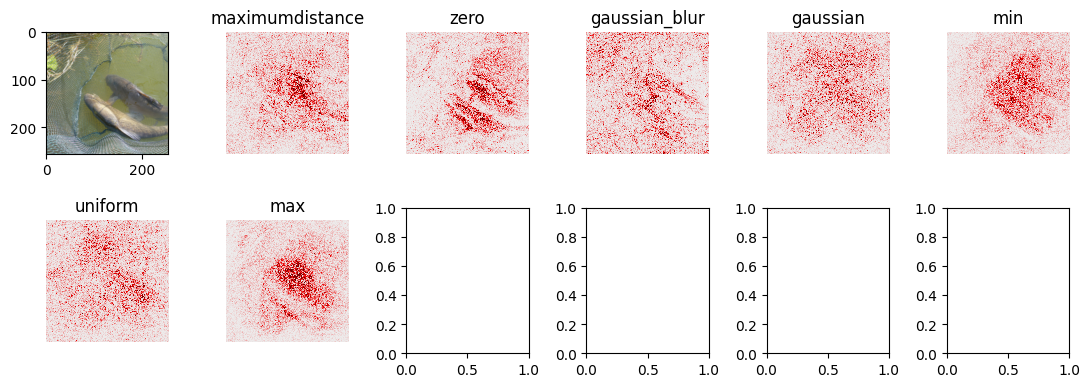

In [3]:

names = {
    'zero',
    'min',
    'max',
    'scalar',
    'encoder',
    'optimizer',
    'hybrid',
    'gaussian_blur',
    'gaussian',
    'uniform',
    'maximumdistance' 
}

index = 0 
x,y = valid_datasets[index]
import numpy as np
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(2, (len(names)//2)+1, figsize=(2*len(names)//2, 2*2))
axes_flat = axes.flat 
my_cmap=plt.cm.seismic(np.arange(plt.cm.seismic.N))

ax = next(axes_flat)
ax.imshow(valid_datasets2[index][0])

for name in names:
    try:
        b_generator =  get_baseline_generator(name)
        baseline = b_generator(x=x,y=y)

    except Exception as e: 
        print("-----")
        print("fail:", name)
        print(e)
        continue
        
    attr = ig(model, x, y, baseline, device=device)
    attr, kwargs  = process_heatmap(attr.cpu(), my_cmap)
    ax = next(axes_flat)
    ax.imshow(attr.numpy(), **kwargs)
    ax.set_title(name)
    ax.axis("off")
plt.tight_layout()